<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/Actividad-6_David/6.2%20Actividad%206.%20FE/Actividad6FE_Equipo04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Said Chávez Cervantes
*   MATRÍCULA: A01114101
*   NOMBRE: David A. Serrano García
*   MATRÍCULA: A01795935
*   NOMBRE: Erik Abel Cruz Yekon
*   MATRÍCULA: ----------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [6]:
# Eliminación de las columnas no relevantes
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df = cars_df.drop(columns=columns_to_drop)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
cars_df.shape

(426880, 18)

In [8]:
# Almacenar la cantidad de observaciones y el número de columnas en variables
num_observations = cars_df.shape[0]
num_columns = cars_df.shape[1]

num_observations, num_columns

(426880, 18)

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [9]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = cars_df.isnull().mean() * 100
missing_percentage.T

region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

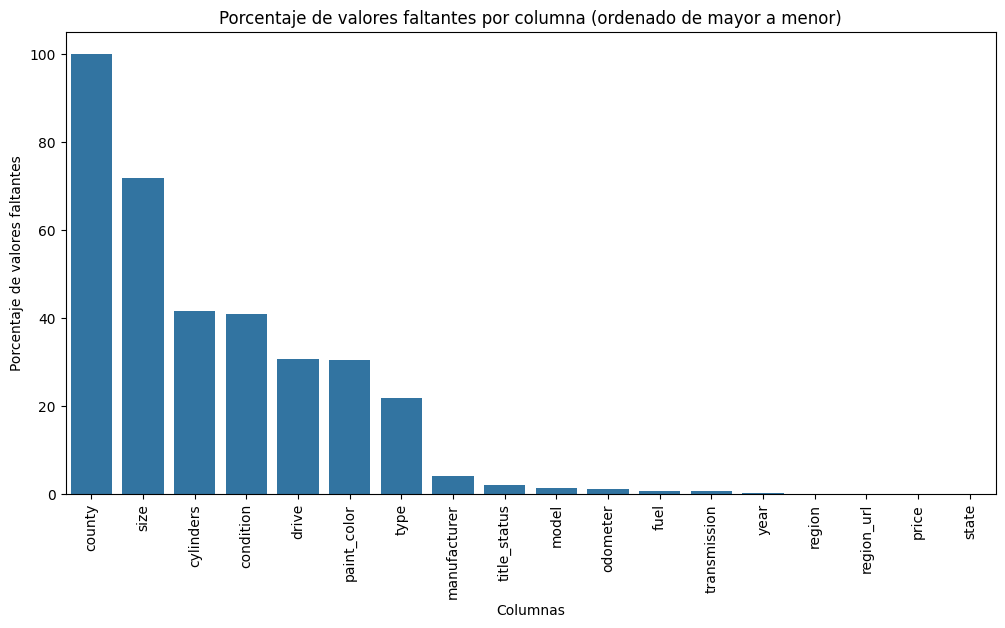

In [10]:
# VISUAL
# Ordenar el porcentaje de valores faltantes de mayor a menor
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Crear una gráfica de barras para representar el porcentaje de valores faltantes ordenados
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna (ordenado de mayor a menor)')
plt.show()

In [11]:
# Eliminar columnas que posean el 30% o más de valores faltantes
threshold = len(cars_df) * 0.70
cars_df = cars_df.dropna(thresh=threshold, axis=1)

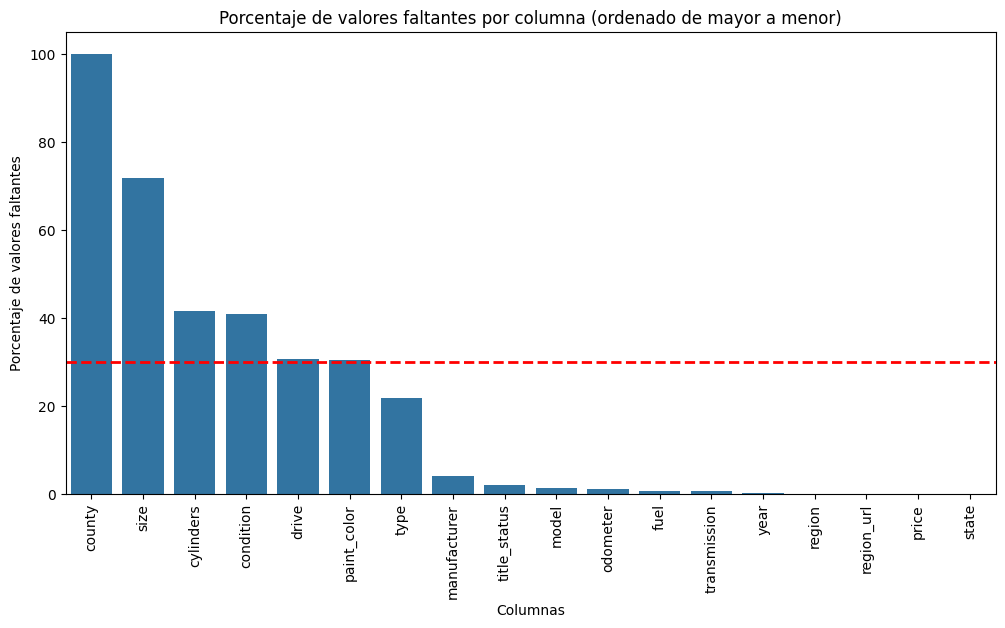

In [12]:
# Crear una gráfica de barras para representar el porcentaje de valores faltantes ordenados con una línea horizontal en el 30%
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.axhline(30, color='red', linestyle='--', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna (ordenado de mayor a menor)')
plt.show()

In [13]:
# Determinar las columnas eliminadas
dropped_columns = [col for col in cars_df.columns if col not in cars_df.columns]
for col in dropped_columns: print(f"Columna: {col}, Eliminada por tener un porcentaje de valores faltantes: {missing_percentage[col]:.2f}%")

In [14]:
# Calcular la cantidad de columnas eliminadas
num_columns_dropped = num_columns - cars_df.shape[1]
print(f"Se eliminaron {num_columns_dropped} columna(s) debido a que tenían el 30% o más de valores faltantes.")

Se eliminaron 6 columna(s) debido a que tenían el 30% o más de valores faltantes.


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [15]:
# Calcular el umbral del 5% de valores faltantes
threshold_percentage = 5

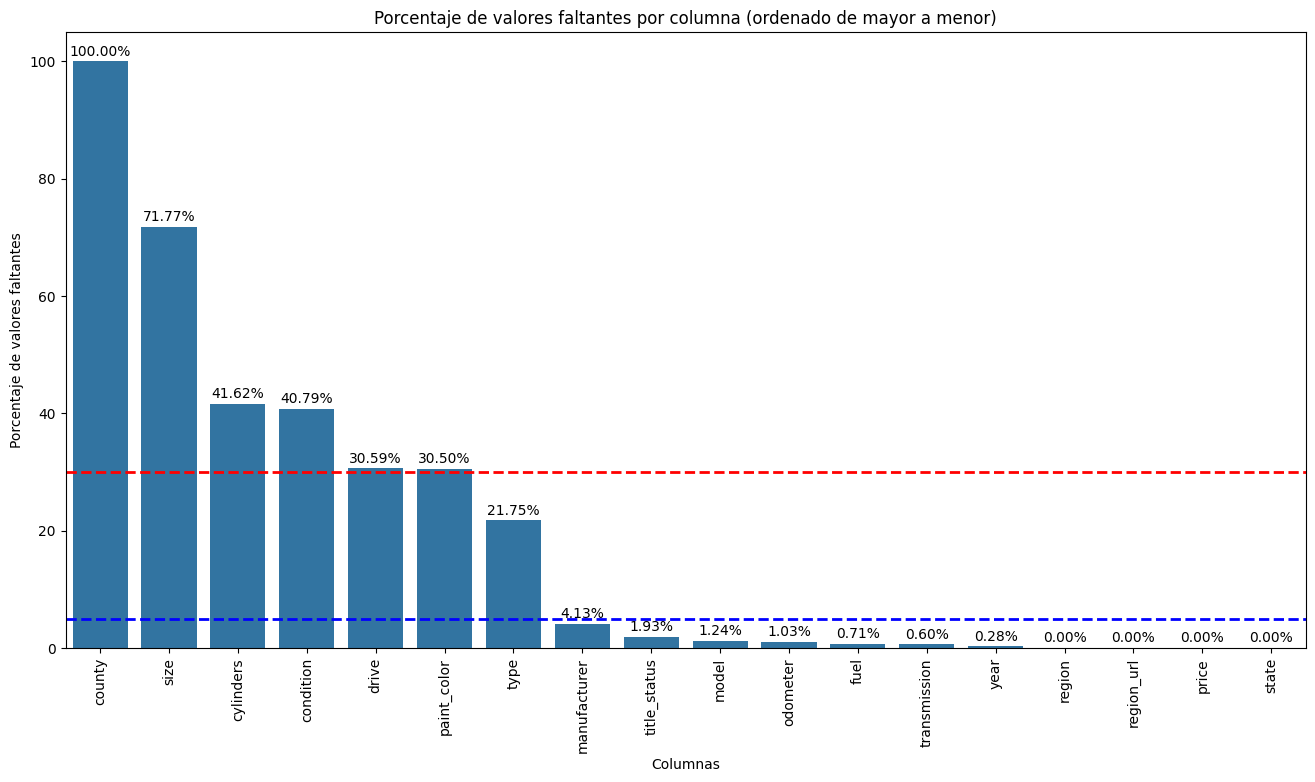

In [16]:
# Crear una gráfica de barras para identificar los valores con menos del 5% faltantes. (Dejamos la referencia del 30%)
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.axhline(30, color='red', linestyle='--', linewidth=2)
plt.axhline(threshold_percentage, color='blue', linestyle='--', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna (ordenado de mayor a menor)')

# Añadir los valores encima de cada barra
for index, value in enumerate(missing_percentage_sorted.values):
    barplot.text(index, value + 0.5, f"{value:.2f}%", ha='center', va='bottom')

plt.show()

In [17]:
# Filtrar las columnas con menos del 5% de valores faltantes
missing_percentage_few_missing = missing_percentage[missing_percentage < threshold_percentage]

In [18]:
# Identificar las columnas con menos del 5% de valores faltantes
columns_with_few_missing = missing_percentage_few_missing.index.tolist()
print(columns_with_few_missing)

['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state']


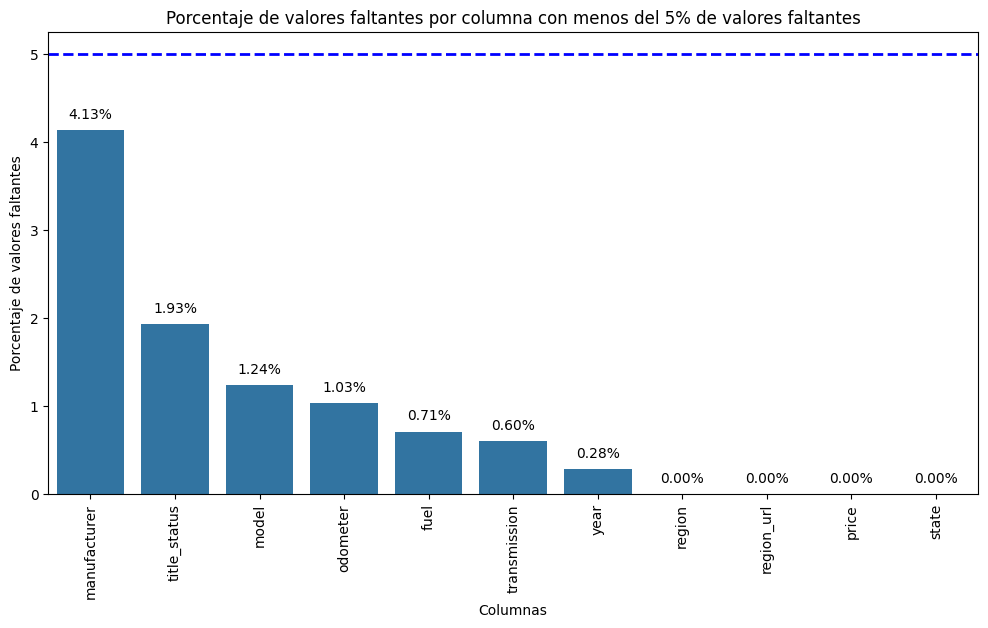

In [19]:
# VISUAL
# Ordenar el porcentaje de valores faltantes de mayor a menor para las columnas filtradas
missing_percentage_few_missing_sorted = missing_percentage_few_missing.sort_values(ascending=False)

# Crear una gráfica de barras para representar el porcentaje de valores faltantes ordenados con una línea horizontal en el 30% y 5%
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=missing_percentage_few_missing_sorted.index, y=missing_percentage_few_missing_sorted.values)
plt.axhline(threshold_percentage, color='blue', linestyle='--', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna con menos del 5% de valores faltantes')

# Añadir los valores encima de cada barra
for index, value in enumerate(missing_percentage_few_missing_sorted.values):
    barplot.text(index, value + 0.1, f"{value:.2f}%", ha='center', va='bottom')

plt.show()

In [20]:
# Simular el proceso de eliminación de registros
initial_num_records = len(cars_df)
cars_df = cars_df.dropna(subset=columns_with_few_missing)
final_num_records = len(cars_df)

In [21]:
# Calcular el porcentaje de registros eliminados
percentage_records_dropped = ((initial_num_records - final_num_records) / initial_num_records) * 100
percentage_records_dropped


8.7321964017991

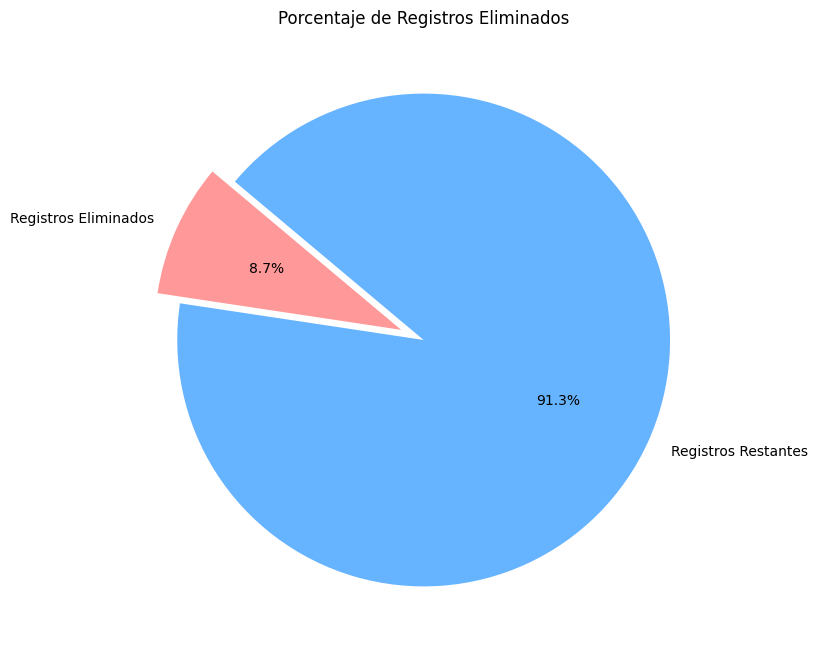

In [22]:
# VISUAL
# Crear una gráfica de pastel para representar el porcentaje de registros eliminados
labels = ['Registros Eliminados', 'Registros Restantes']
sizes = [percentage_records_dropped, 100 - percentage_records_dropped]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explotar el primer pedazo

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Registros Eliminados')
plt.show()

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [23]:
# Identificar las columnas que aún poseen valores faltantes
columns_with_missing = cars_df.columns[cars_df.isnull().any()].tolist()
columns_with_missing

['type']

sedan


<ipython-input-24-80dd8c41baae>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)


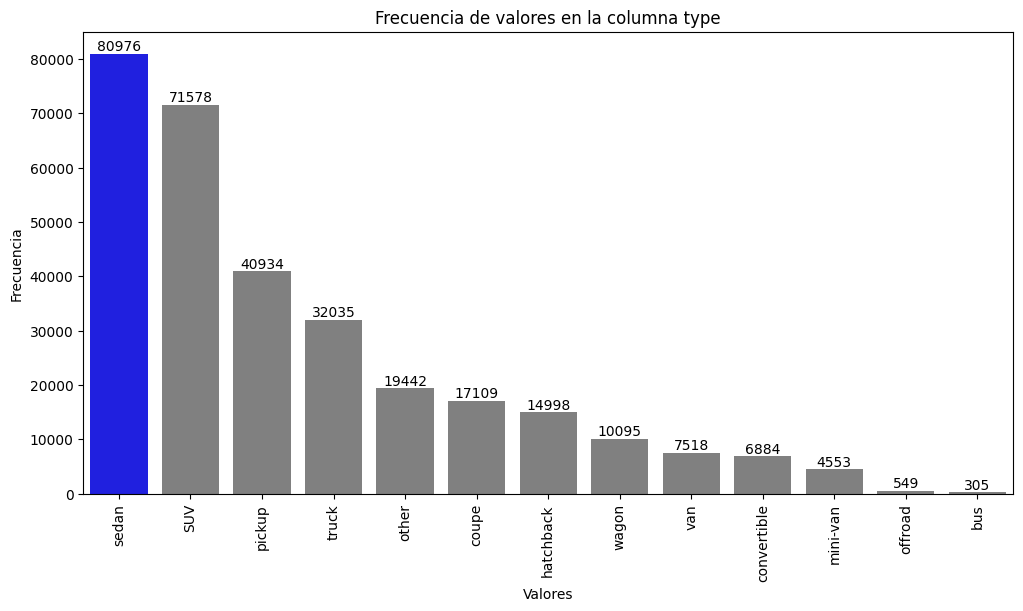

In [24]:
# Crear una gráfica de barras para los value_counts de cada columna con valores faltantes para visualizar la moda.
for column in columns_with_missing:
    plt.figure(figsize=(12, 6))

    value_counts = cars_df[column].value_counts(dropna=True)

    # Determinar el índice del valor de la moda
    mode_index = value_counts.idxmax()
    print(mode_index)
    # Colorear las barras, destacando la moda
    colors = ['blue' if val == mode_index else 'gray' for val in value_counts.index]

    barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
    plt.xticks(rotation=90)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de valores en la columna {column}')

    # Añadir los valores encima de cada barra
    for index, value in enumerate(value_counts.values):
        barplot.text(index, value + 0.5, f"{value}", ha='center', va='bottom')

    plt.show()

In [25]:
# Imputar la columna 'type' con valores categoricos usando la moda.
column_to_impute = 'type'

# Calcular la moda de la columna
mode_value = cars_df[column_to_impute].mode()[0]

# Imputar los valores faltantes utilizando la moda con inplace
cars_df[column_to_impute] = cars_df[column_to_impute].fillna(mode_value)

In [26]:
# Verificar si hay valores faltantes restantes en 'type'
remaining_missing_in_type = cars_df[column_to_impute].isnull().sum()

remaining_missing_in_type

0

sedan


<ipython-input-27-ee9237dfa50f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)


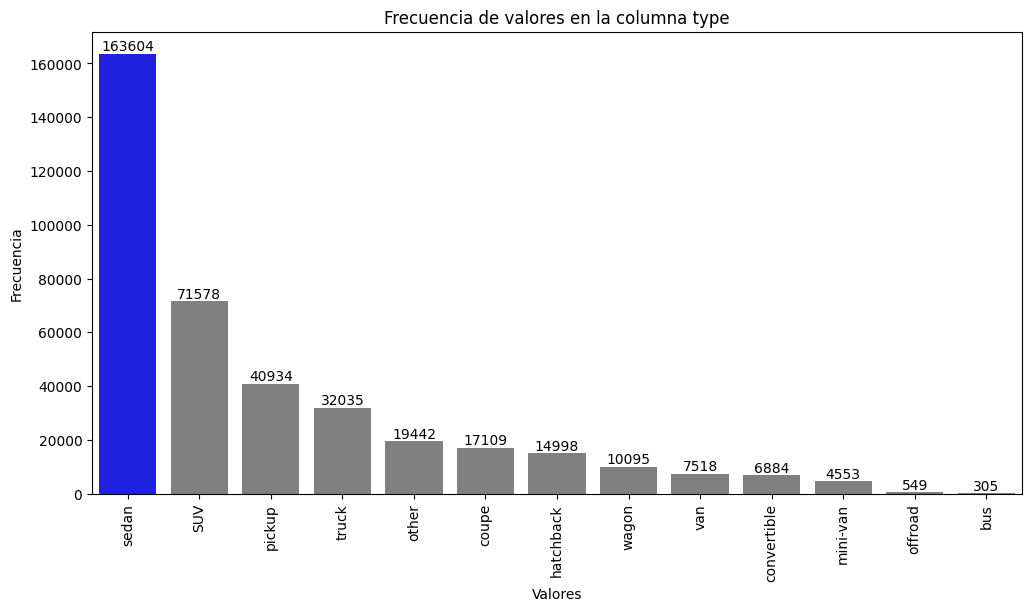

In [27]:
# Crear una gráfica de barras para los value_counts de la columna 'type' visualizar el nuevo recuento.
plt.figure(figsize=(12, 6))

value_counts = cars_df['type'].value_counts(dropna=True)

# Determinar el índice del valor de la moda
mode_index = value_counts.idxmax()
print(mode_index)
# Colorear las barras, destacando la moda
colors = ['blue' if val == mode_index else 'gray' for val in value_counts.index]

barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de valores en la columna {column}')

# Añadir los valores encima de cada barra
for index, value in enumerate(value_counts.values):
    barplot.text(index, value + 0.5, f"{value}", ha='center', va='bottom')

plt.show()

In [28]:
# Identificar las columnas que aún poseen valores faltantes
columns_with_missing = cars_df.columns[cars_df.isnull().any()].tolist()
columns_with_missing

[]

## Valores atípicos

In [29]:
# Funciones para calcular los bins > NOT BEING USE <
def sturges_rule(n):
    return int(np.ceil(np.log2(n) + 1))

def freedman_diaconis_rule(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    return int(np.ceil((data.max() - data.min()) / bin_width))

def sqrt_rule(n):
    return int(np.ceil(np.sqrt(n)))

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

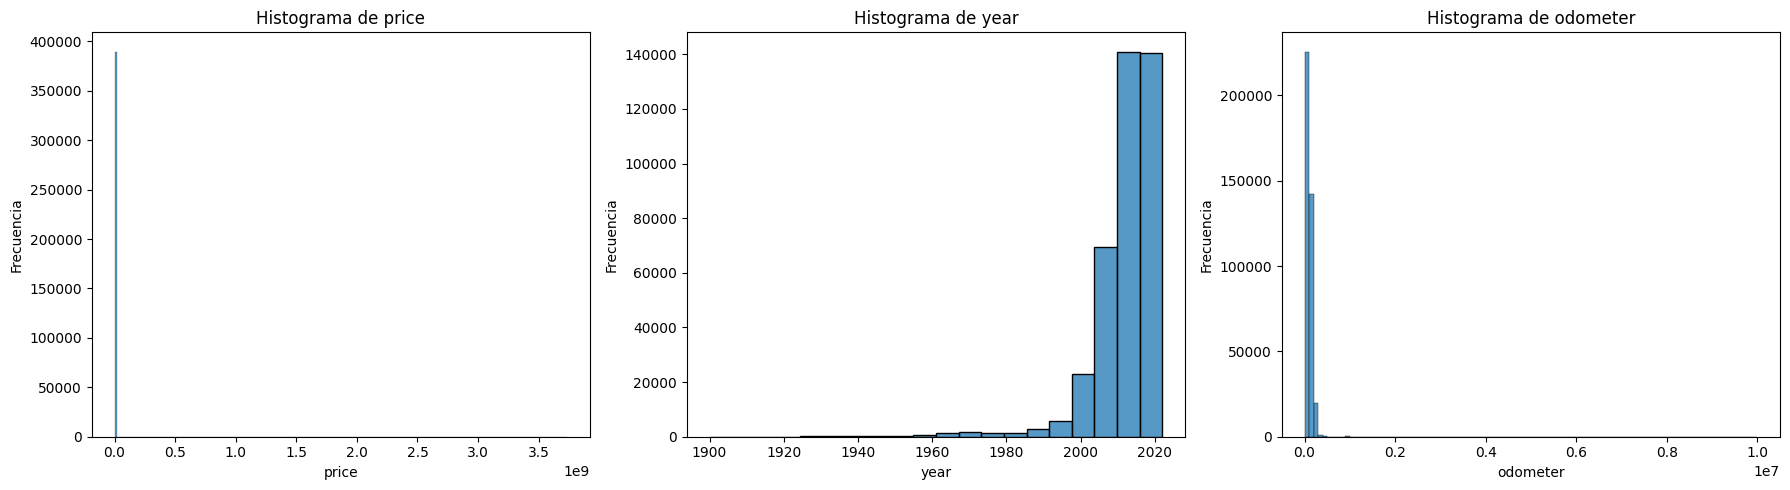

In [30]:
# Crear histogramas para las variables price, year y odometer del DataFrame original cars_df usando Seaborn

plt.figure(figsize=(18, 5))

column = 'price'
if column in cars_df.columns:
  plt.subplot(1, 3, 1)
  # bins = freedman_diaconis_rule(cars_df[column].dropna())
  sns.histplot(cars_df[column], bins=200).set(title=f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')

column = 'year'
if column in cars_df.columns:
  plt.subplot(1, 3, 2)
  # bins = freedman_diaconis_rule(cars_df[column].dropna())
  sns.histplot(cars_df[column], bins=20).set(title=f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')

column = 'odometer'
if column in cars_df.columns:
  plt.subplot(1, 3, 3)
  # bins = freedman_diaconis_rule(cars_df[column].dropna())
  sns.histplot(cars_df[column], bins=100).set(title=f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

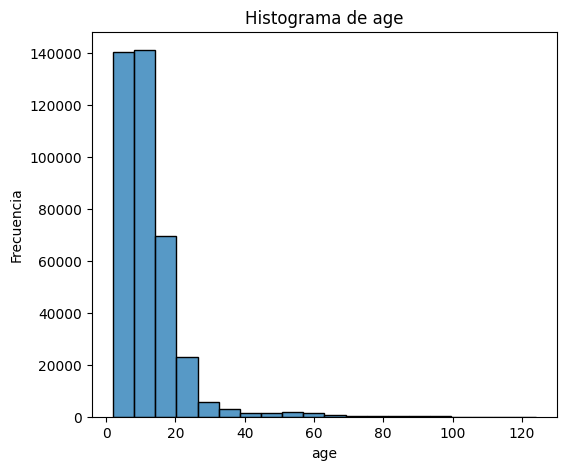

In [31]:
# Obtener el año actual automáticamente
# current_year = datetime.datetime.now().year
current_year = 2024

if 'year' in cars_df.columns:
  # Calcular la columna 'age' a partir de la columna 'year'
  cars_df['age'] = current_year - cars_df['year']

  # Eliminar la columna 'year'
  cars_df = cars_df.drop(columns=['year'])

# Crear histograma para la nueva variable 'age' utilizando Seaborn
plt.figure(figsize=(6, 5))
sns.histplot(cars_df['age'], bins=20).set(title='Histograma de age')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

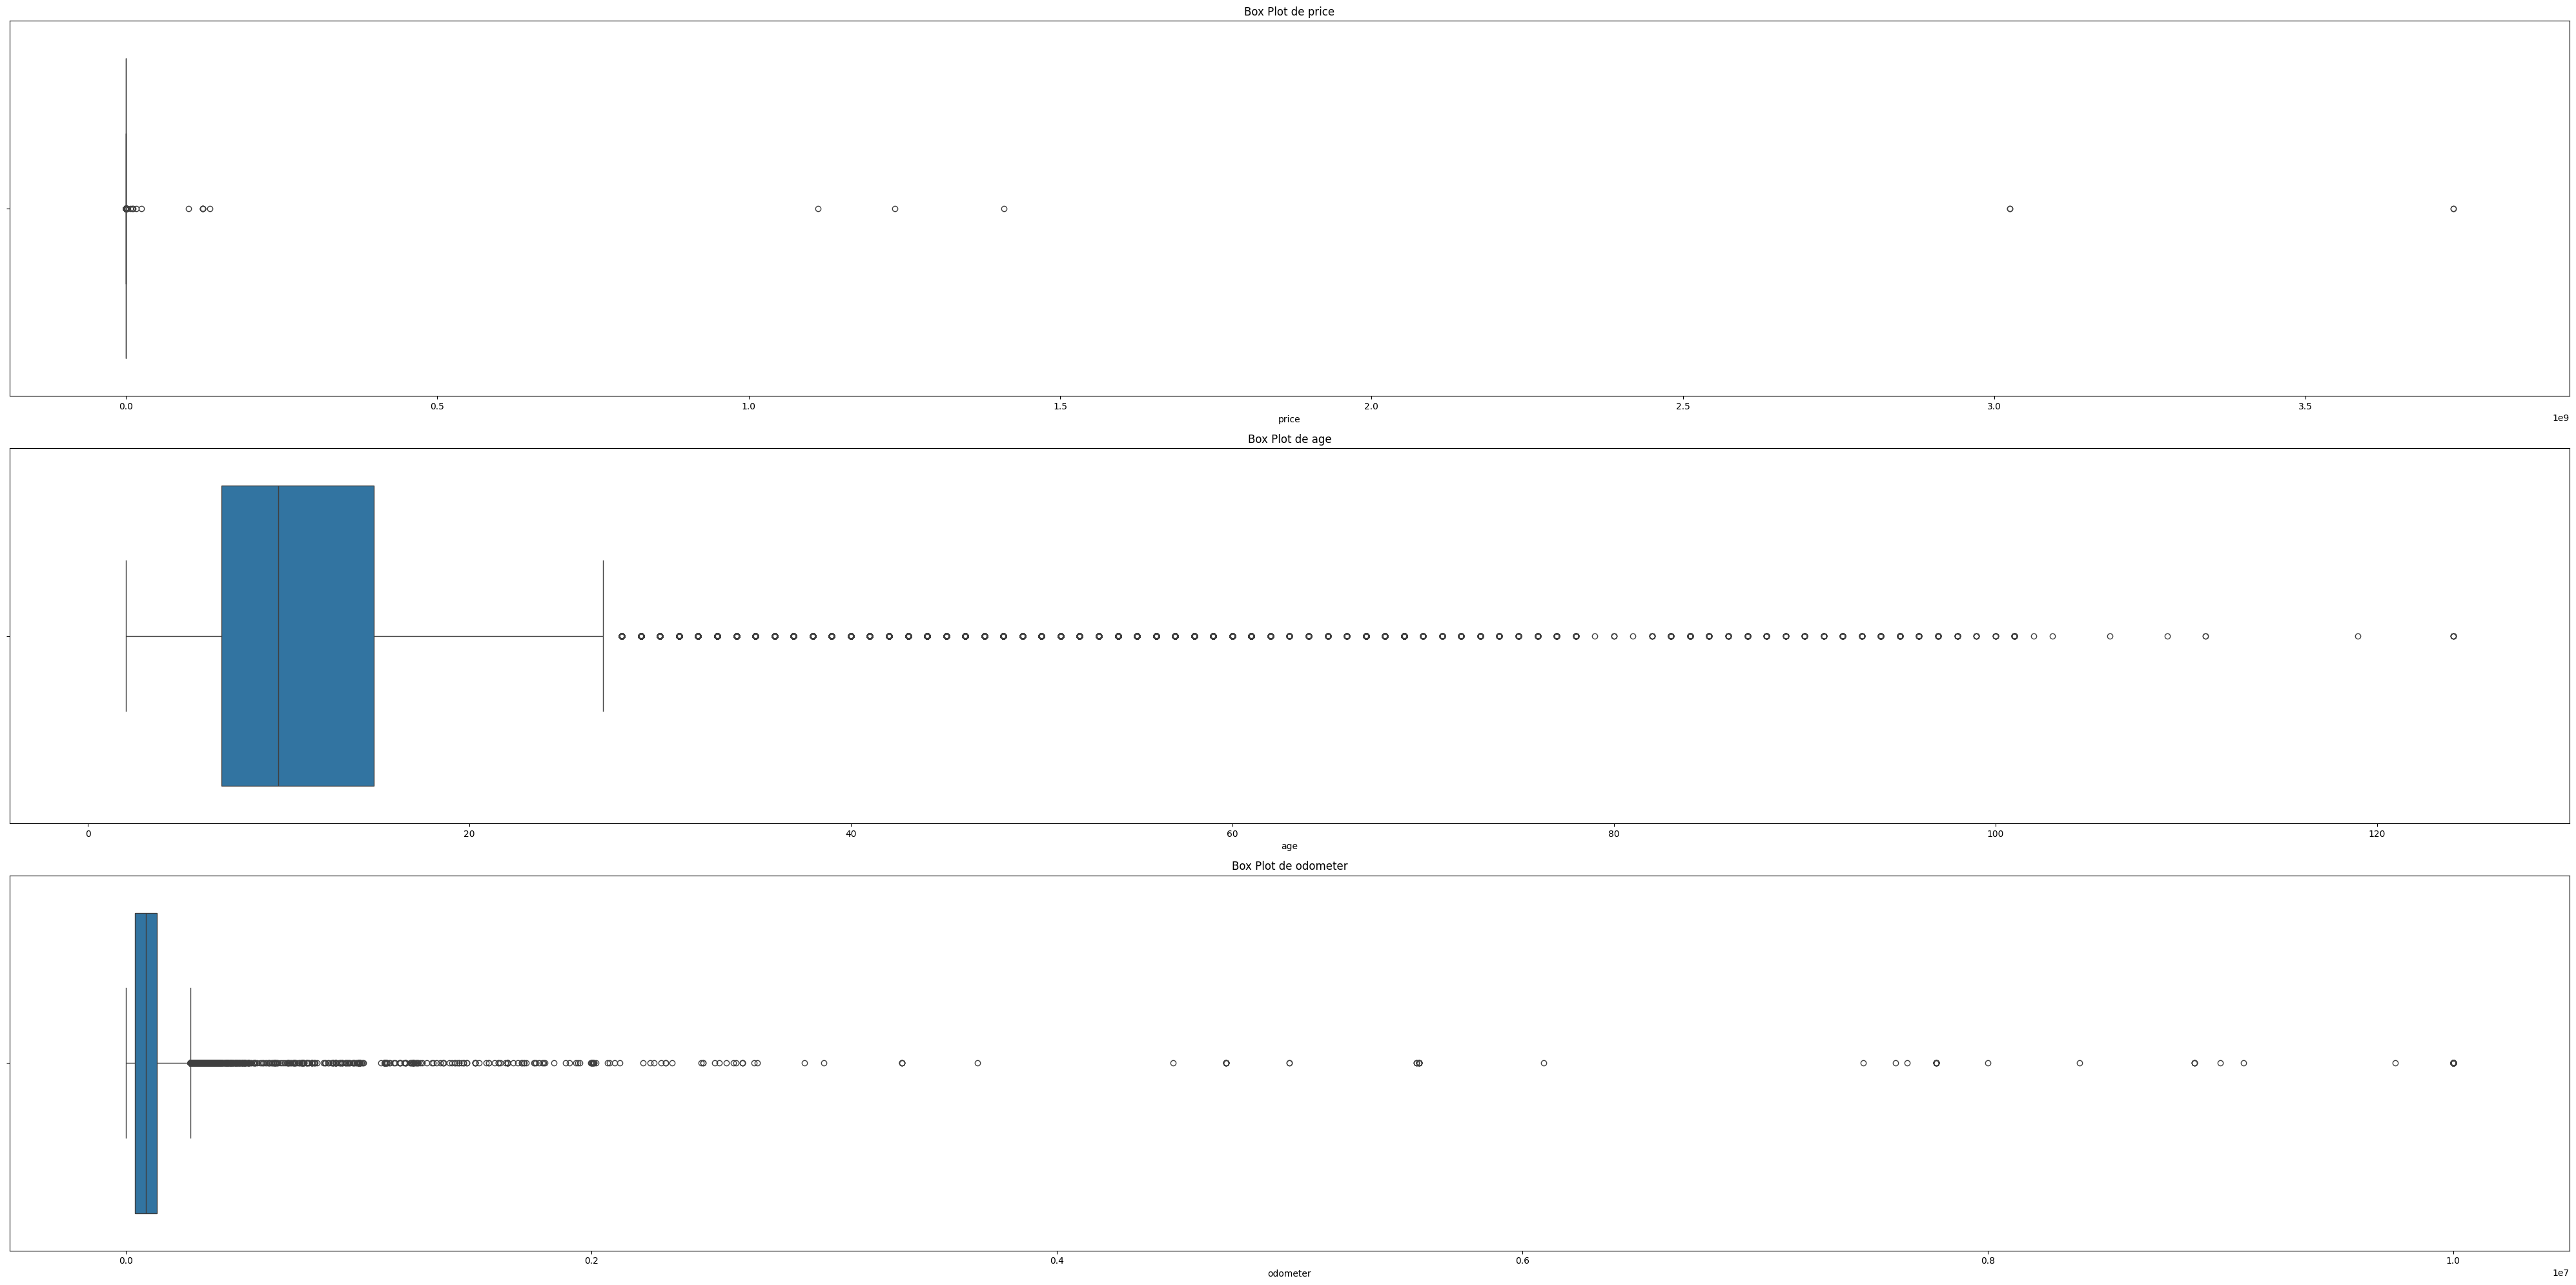

In [32]:
# Crear gráficos de box plot horizontales para las variables 'price', 'age' y 'odometer'
plt.figure(figsize=(40, 20))

plt.subplot(3, 1, 1)
sns.boxplot(x=cars_df['price']).set(title='Box Plot de price')
plt.xlabel('price')

plt.subplot(3, 1, 2)
sns.boxplot(x=cars_df['age']).set(title='Box Plot de age')
plt.xlabel('age')

plt.subplot(3, 1, 3)
sns.boxplot(x=cars_df['odometer']).set(title='Box Plot de odometer')
plt.xlabel('odometer')

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [33]:
# Función para calcular los límites de los valores atípicos
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [34]:
# Identificar los valores atípicos y crear gráficos de pastel
columns_to_check = ['price', 'age', 'odometer']
initial_num_records = len(cars_df)

Porcentaje de valores atípicos en price: 1.71%
Porcentaje de valores atípicos en age: 3.65%
Porcentaje de valores atípicos en odometer: 0.83%


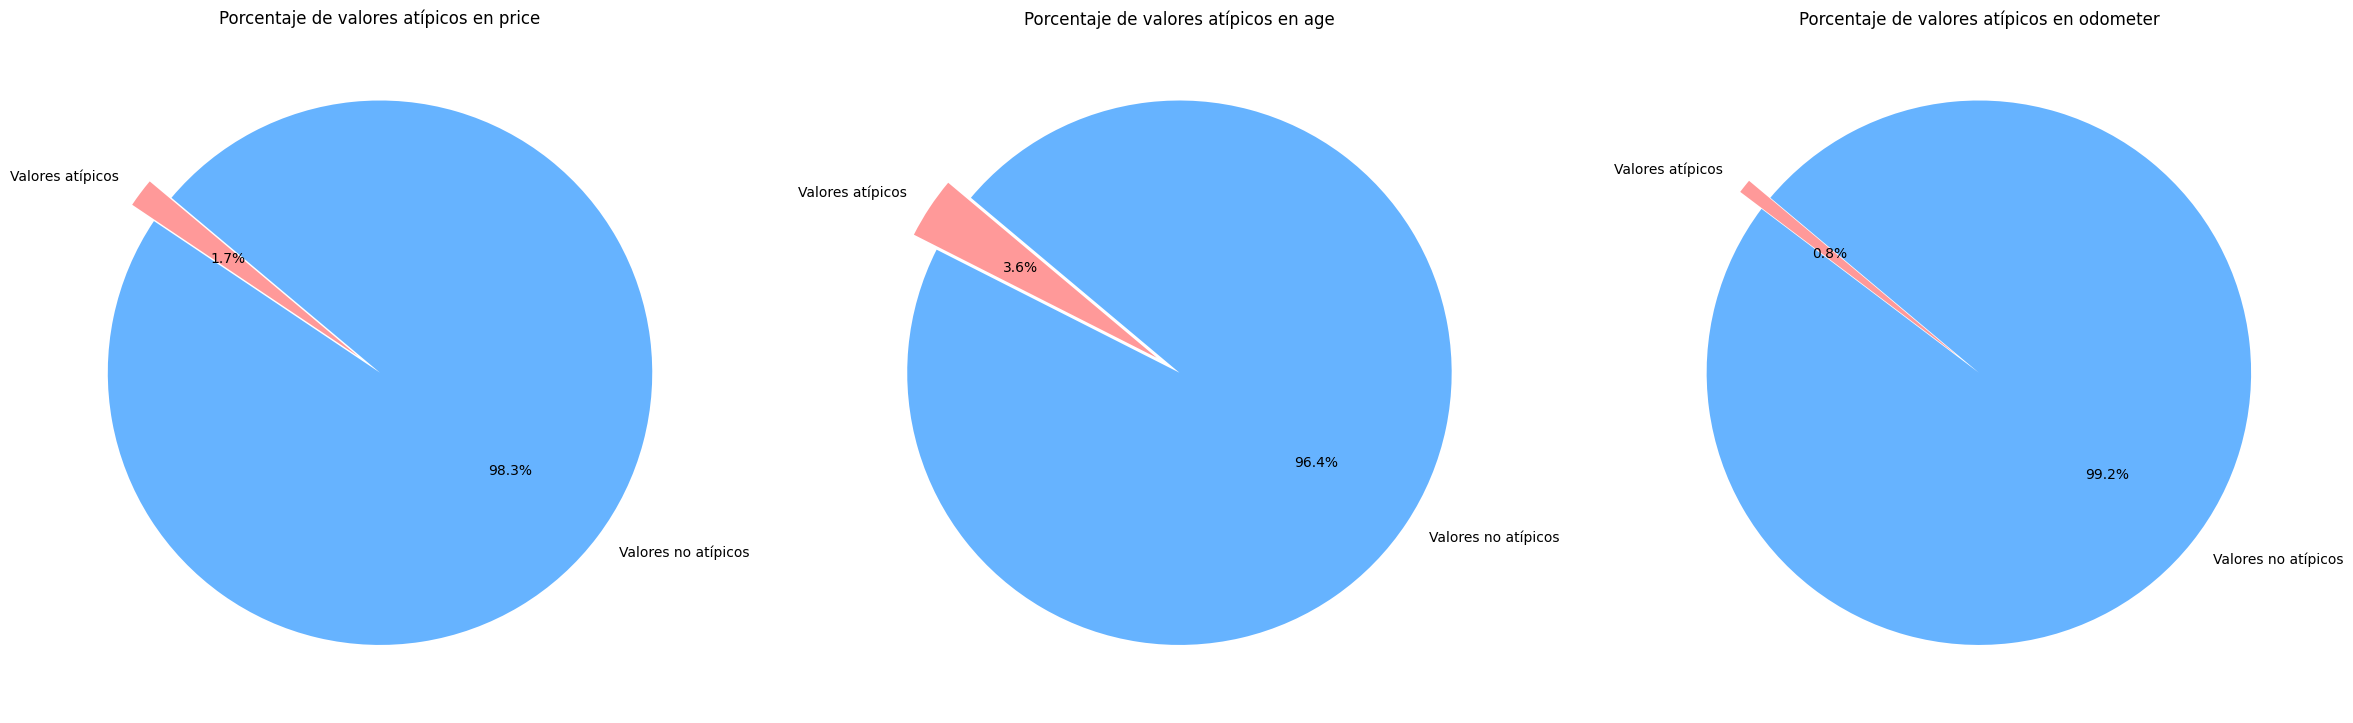

In [35]:
# VISUAL
# Configuración para la figura de gráficos de pastel
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

for i, column in enumerate(columns_to_check):
    lower_bound, upper_bound = calculate_outlier_bounds(cars_df[column])
    outliers = cars_df[(cars_df[column] < lower_bound) | (cars_df[column] > upper_bound)]
    percentage_outliers = len(outliers) / len(cars_df) * 100
    print(f"Porcentaje de valores atípicos en {column}: {percentage_outliers:.2f}%")

    # Crear gráfica de pastel para los valores atípicos
    labels = ['Valores atípicos', 'Valores no atípicos']
    sizes = [percentage_outliers, 100 - percentage_outliers]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # explotar el primer pedazo

    axs[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Porcentaje de valores atípicos en {column}')

# Mostrar gráficos de pastel para valores atípicos
plt.tight_layout()
plt.show()

In [36]:
# Eliminar los valores atípicos
for column in columns_to_check:
    lower_bound, upper_bound = calculate_outlier_bounds(cars_df[column])
    cars_df.loc[(cars_df[column] < lower_bound) | (cars_df[column] > upper_bound), column] = np.nan

In [37]:
# Calcular el porcentaje de registros eliminados
final_num_records = cars_df.dropna().shape[0]
percentage_records_dropped = ((initial_num_records - final_num_records) / initial_num_records) * 100

El porcentaje de registros eliminados es: 5.97%.


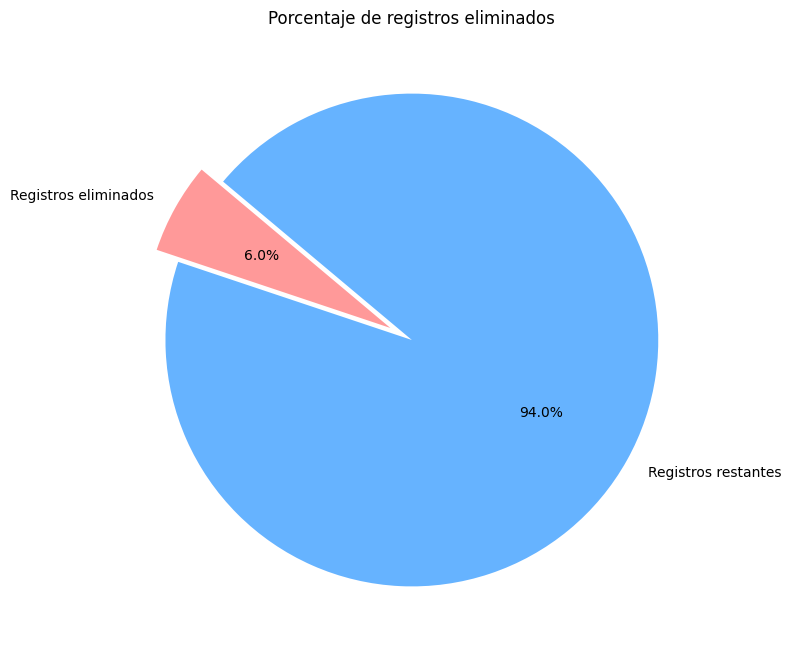

In [38]:
# Crear gráfica de pastel para el porcentaje de registros eliminados
labels = ['Registros eliminados', 'Registros restantes']
sizes = [percentage_records_dropped, 100 - percentage_records_dropped]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explotar el primer pedazo

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de registros eliminados')

print(f"El porcentaje de registros eliminados es: {percentage_records_dropped:.2f}%.")

plt.show()

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

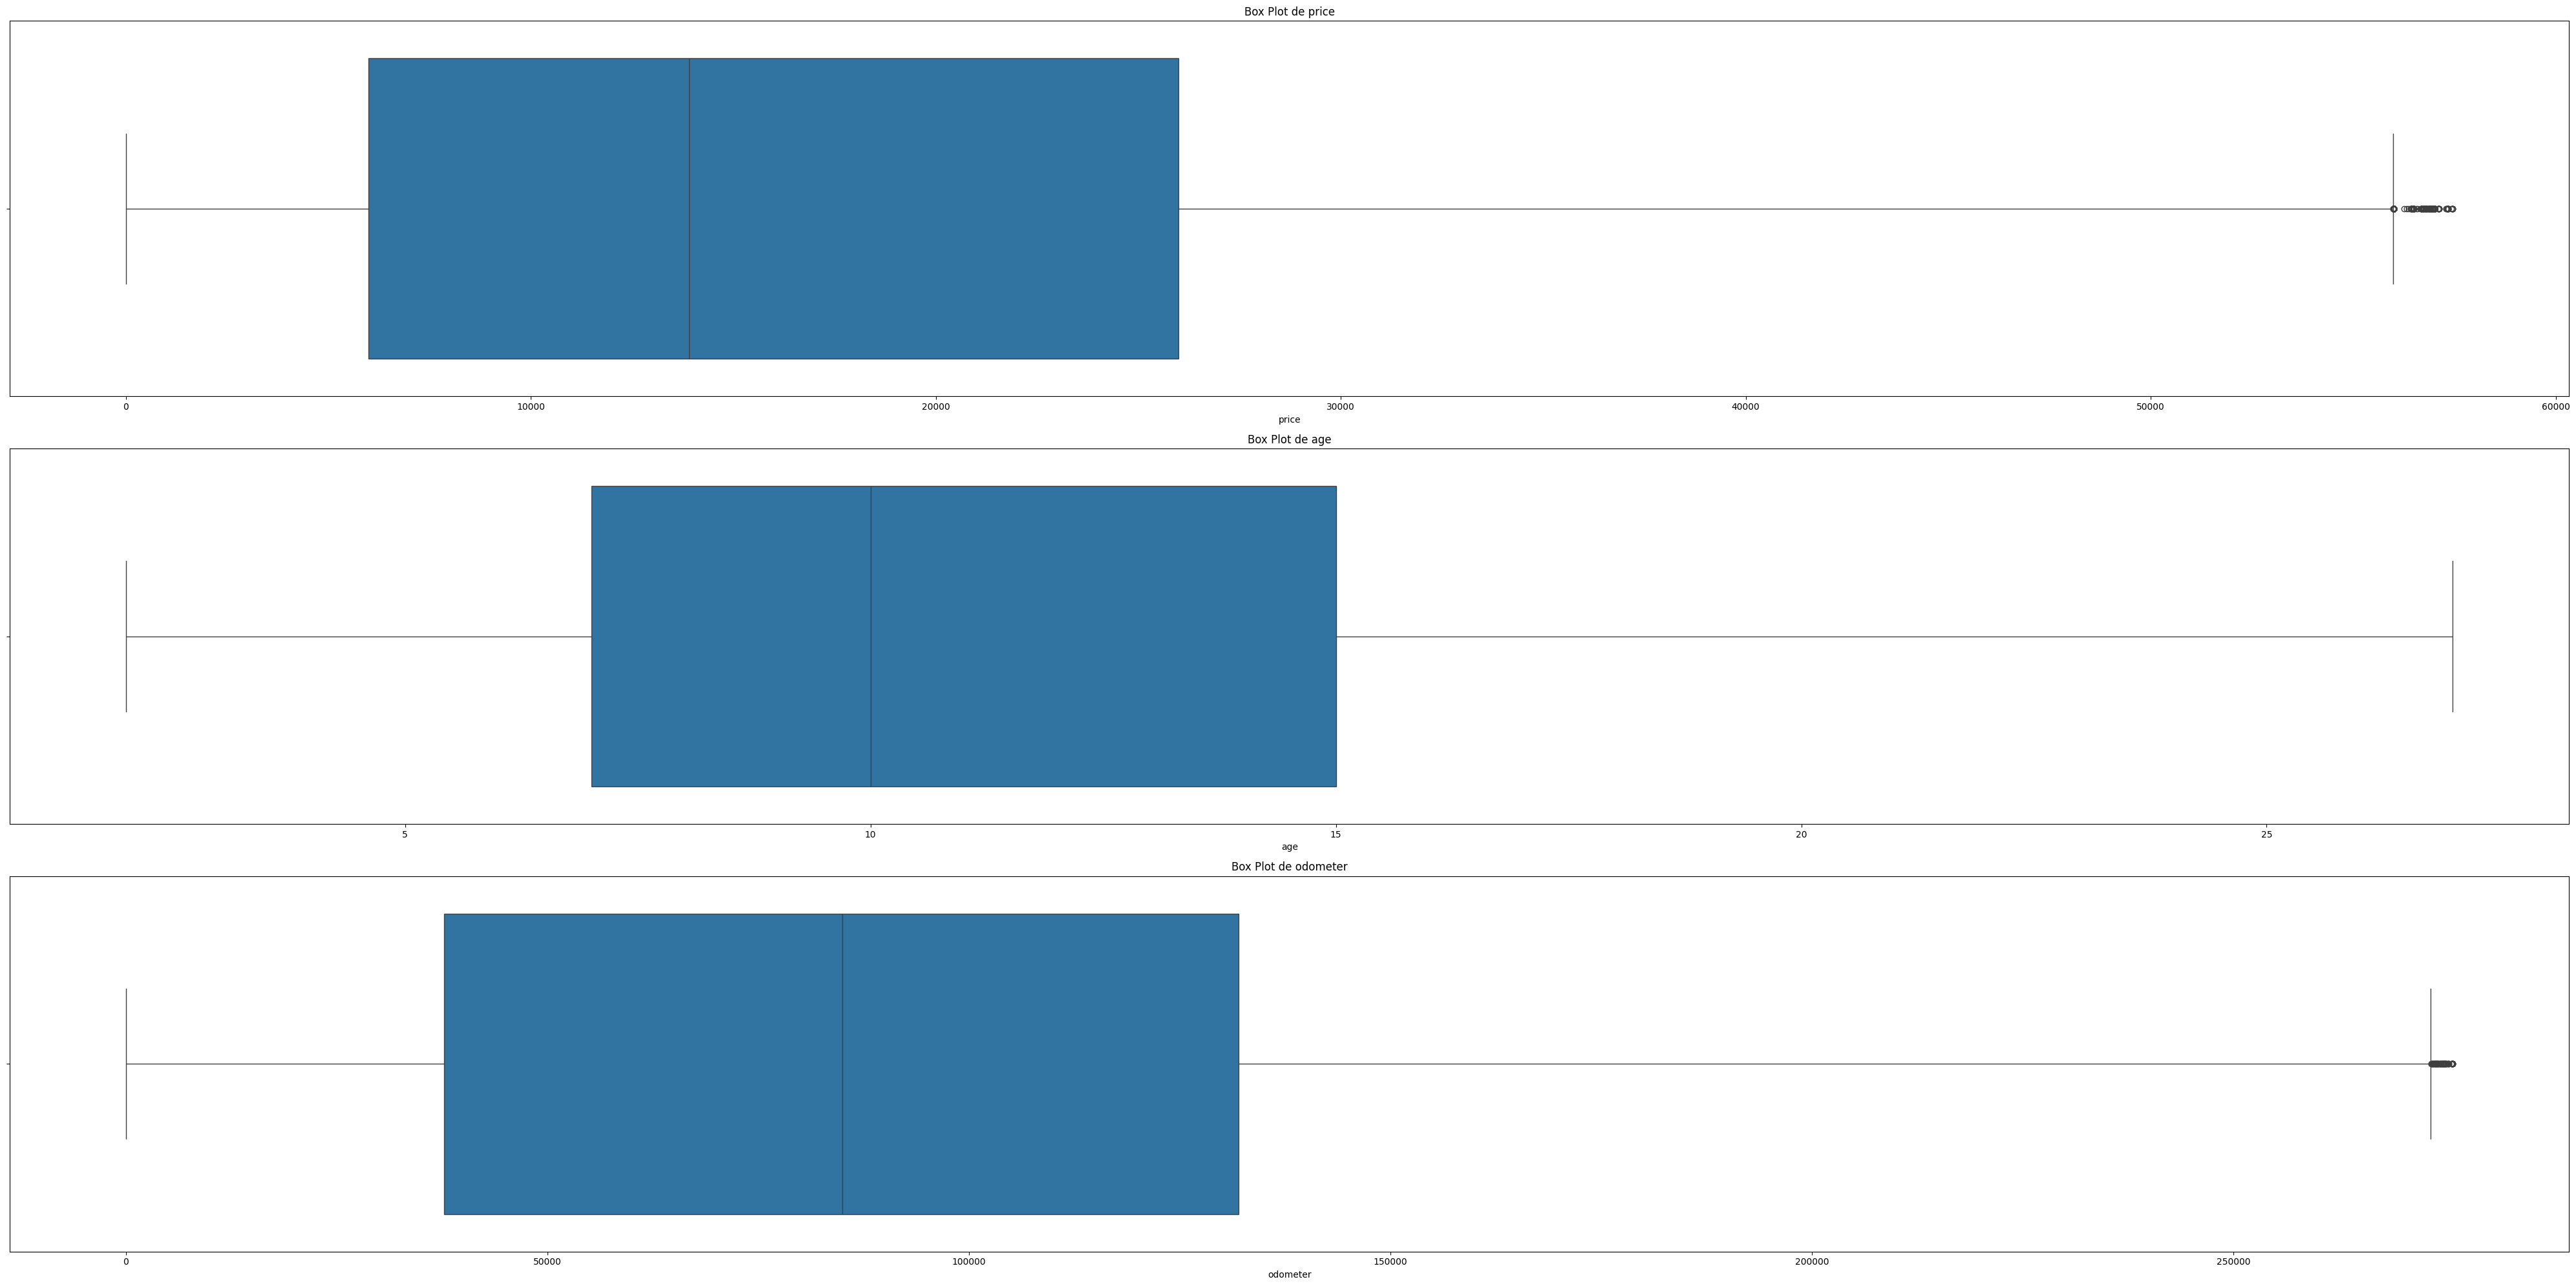

In [39]:
# Crear gráficos de box plot horizontales para las variables 'price', 'age' y 'odometer'
plt.figure(figsize=(40, 20))

plt.subplot(3, 1, 1)
sns.boxplot(x=cars_df['price']).set(title='Box Plot de price')
plt.xlabel('price')

plt.subplot(3, 1, 2)
sns.boxplot(x=cars_df['age']).set(title='Box Plot de age')
plt.xlabel('age')

plt.subplot(3, 1, 3)
sns.boxplot(x=cars_df['odometer']).set(title='Box Plot de odometer')
plt.xlabel('odometer')

plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.